# Practical Case: Energy Price per Market

<style>
    table.custom-table {
        max-width: 1000px;
        width: 100%;
        margin: 0 auto; /* centers the table on the page */
    }

    table.custom-table td {
        background-color: #fff;
    }
    
    table.custom-table th, table.custom-table td {
        text-align: center;
        vertical-align: middle;
        padding: 5px;
        width: 333px; /* distribute the total width equally among three columns */
    }

    table.custom-table img {
        width: 100%;
        display: block; /* removes any gap under the image */
    }
</style>


<table class="custom-table">
    <thead>
        <tr>
            <th>Output: Market Volatility</th>
            <th>Output: Average Monthly Price</th>
            <th>Input: Hourly Price per Market</th>
        </tr>
    </thead>
    <tbody>
        <tr>
            <td>
                <img src="src/04_output_2.png" alt="Solar Image 1">
            </td>
            <td>
                <img src="src/04_output_1.png" alt="Solar Image 2">
            </td>
            <td>
                <img src="src/04_input.png" alt="Solar Image 3">
            </td>
        </tr>
    </tbody>
</table>


## Data

In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
df = pd.read_csv('../data/omie-markets-price.csv', index_col=0, parse_dates=True)
df.index = pd.to_datetime(df.index, utc=True).tz_convert('Europe/Madrid')
df

,0,1,2,3,4,5,6,7
datetime_utc,,,,,,,,
2023-06-04 00:00:00+02:00,85.05250,85.00,82.01,76.11,NaN,NaN,NaN,NaN
2023-06-04 01:00:00+02:00,79.20750,85.00,84.99,80.01,NaN,NaN,NaN,NaN
2023-06-04 02:00:00+02:00,78.01250,84.96,84.96,80.01,NaN,NaN,NaN,NaN
2023-06-04 03:00:00+02:00,75.45250,82.35,83.35,80.01,NaN,NaN,NaN,NaN
2023-06-04 04:00:00+02:00,74.17875,78.65,76.95,72.75,72.75,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
2023-11-05 19:00:00+01:00,68.18250,23.44,23.44,22.00,21.89,23.44,32.30,NaN
2023-11-05 20:00:00+01:00,60.12125,32.30,34.80,29.90,24.80,27.61,33.30,45.630
2023-11-05 21:00:00+01:00,49.88875,30.01,40.00,33.30,25.00,26.00,30.02,63.645


## Resampling the Time
- [Date offset `rule` list](https://pandas.pydata.org/docs/user_guide/timeseries.html#dateoffset-objects)
- [Pandas plot `kind` list](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html)

### Data Processing

In [5]:
df_month = df.to_period('M')
dff = df_month.melt(ignore_index=False).reset_index()
dff.datetime_utc = dff.datetime_utc.dt.strftime('%Y-%m')
dff

,datetime_utc,variable,value
0,2023-06,0,85.05250
1,2023-06,0,79.20750
2,2023-06,0,78.01250
3,2023-06,0,75.45250
4,2023-06,0,74.17875
...,...,...,...
29763,2023-11,7,NaN
29764,2023-11,7,45.63000
29765,2023-11,7,63.64500
29766,2023-11,7,62.85000


### Data Visualization

In [9]:
import plotly.express as px

px.box(dff, x='datetime_utc', y='value', color='datetime_utc', facet_col='variable', facet_col_wrap=3, title='OMIE Markets Price (€/MWh)', height=800, width=800)

### Data Processing

,datetime_utc,variable,value
0,2023-06-30 00:00:00+02:00,0,97.638391
1,2023-07-31 00:00:00+02:00,0,85.093915
...,...,...,...
46,2023-10-31 00:00:00+01:00,7,101.695968
47,2023-11-30 00:00:00+01:00,7,16.108250


### Data Visualization

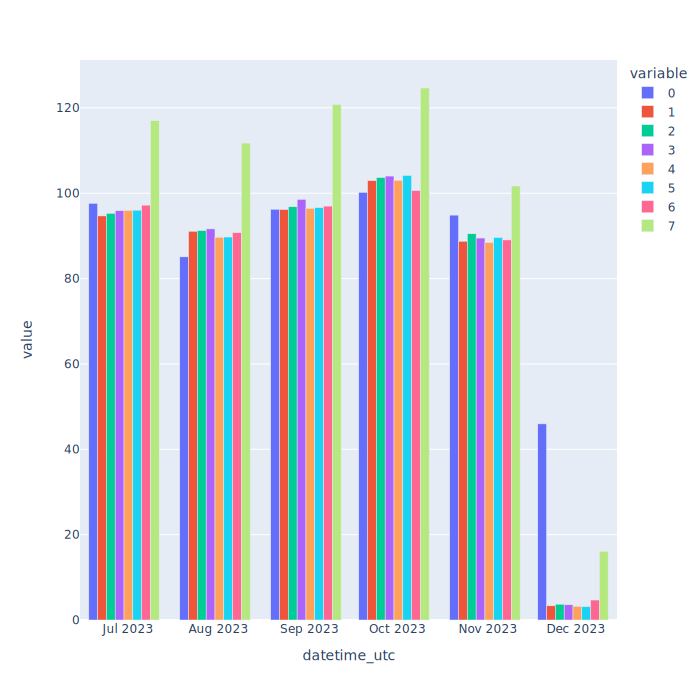

## Visualize Time Series Correlation

### Scatter Matrix

- [Plotly Express Overview](https://plotly.com/python/plotly-express/#overview)

,0,1,2,3,4,5,6,7
datetime_utc,,,,,,,,
2023-06-04 00:00:00+02:00,80.365037,82.406726,82.143780,80.778155,82.054357,83.314454,81.915952,98.137321
2023-06-11 00:00:00+02:00,99.523296,94.653363,96.041637,96.536607,95.343571,95.247185,94.569405,118.872679
...,...,...,...,...,...,...,...,...
2023-10-29 00:00:00+02:00,60.217877,22.966450,22.814024,22.912337,21.837766,18.931134,21.626726,15.592143
2023-11-05 00:00:00+01:00,37.020104,1.254583,-1.687083,-2.285417,0.807750,1.382647,8.056250,51.011250


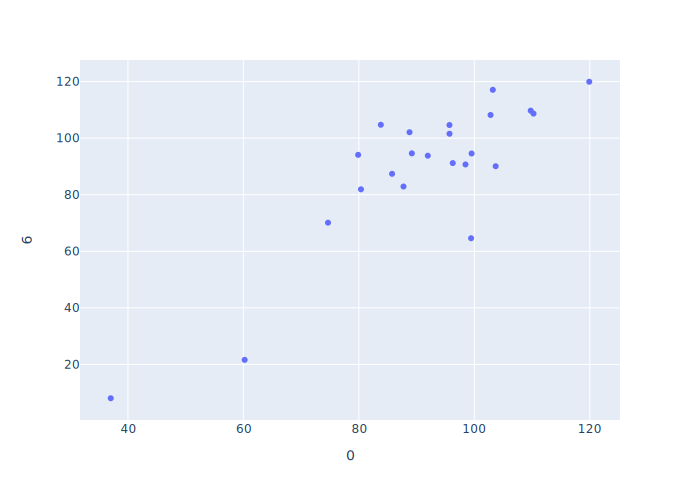

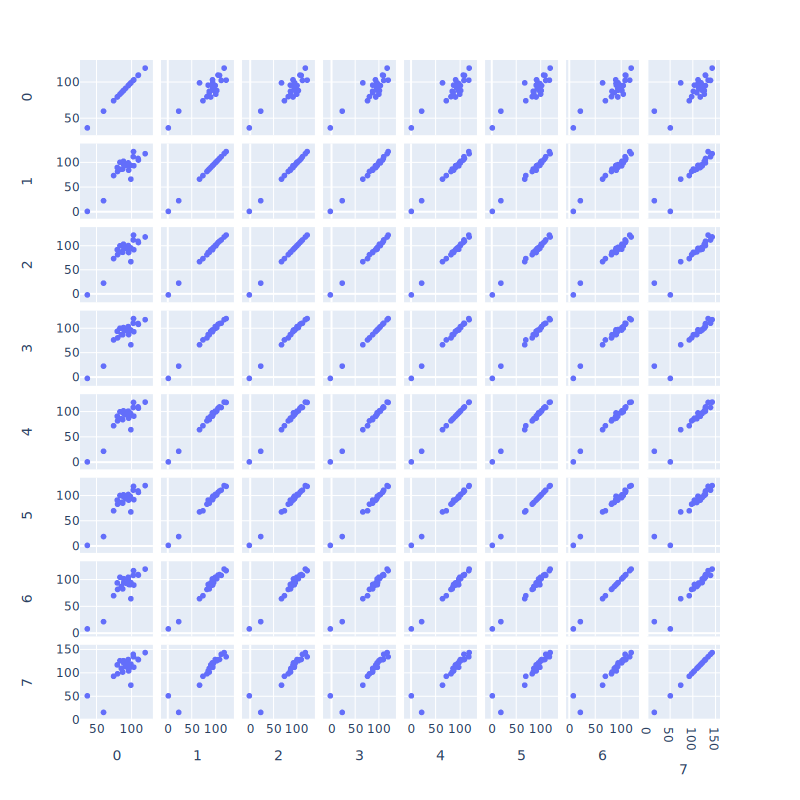

### Correlation Matrix

,0,1,2,3,4,5,6,7
0,1.00,0.74,0.74,0.72,0.72,0.72,0.68,0.72
1,0.74,1.00,0.99,0.97,0.97,0.96,0.95,0.90
2,0.74,0.99,1.00,0.98,0.98,0.97,0.95,0.91
3,0.72,0.97,0.98,1.00,0.98,0.97,0.95,0.91
4,0.72,0.97,0.98,0.98,1.00,0.98,0.96,0.92
5,0.72,0.96,0.97,0.97,0.98,1.00,0.97,0.93
6,0.68,0.95,0.95,0.95,0.96,0.97,1.00,0.94
7,0.72,0.90,0.91,0.91,0.92,0.93,0.94,1.00


### Other Plots

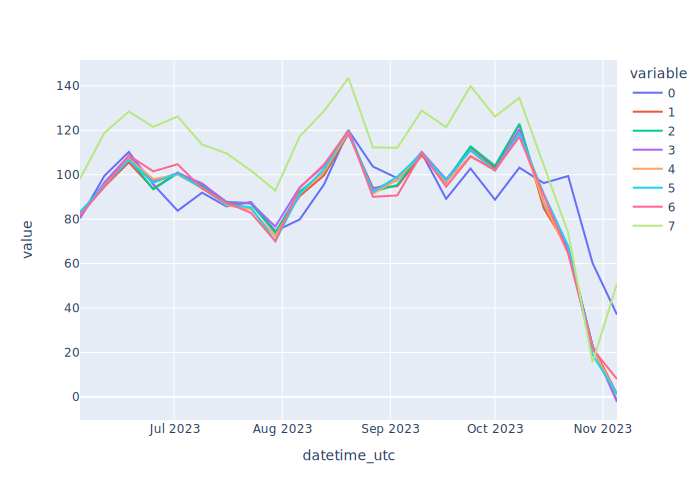

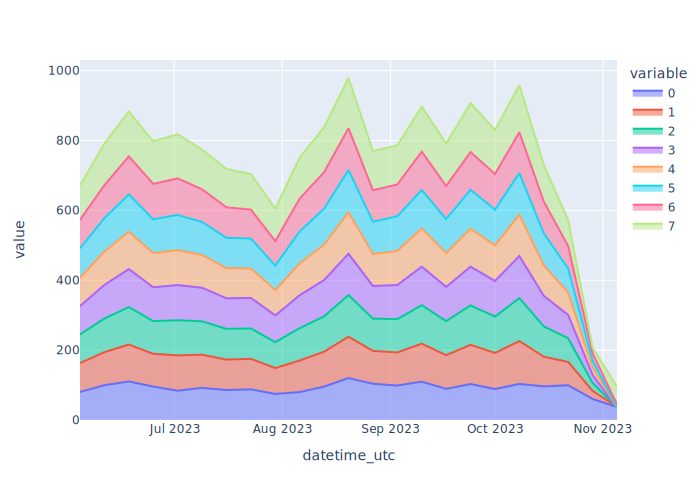

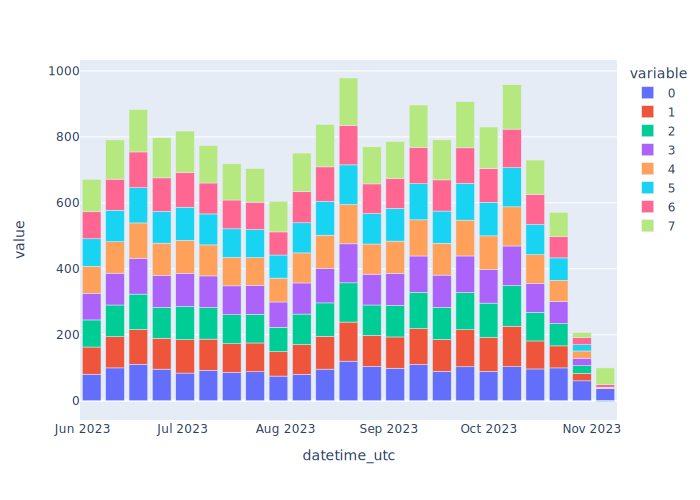

## Pivot Tables

### Transform object to DataFrame

> Only if you don't have a DataFrame yet.

,0,1,2,3,4,5,6,7
datetime_utc,,,,,,,,
2023-06-04 00:00:00+02:00,85.0525,85.00,82.01,76.11,NaN,NaN,NaN,NaN
2023-06-04 01:00:00+02:00,79.2075,85.00,84.99,80.01,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
2023-11-05 22:00:00+01:00,48.0075,23.44,26.87,22.86,22.0,22.86,27.86,62.85
2023-11-05 23:00:00+01:00,40.0250,15.92,18.42,16.42,14.0,16.40,19.00,31.92


### Time series categories in one column

,variable,value
datetime_utc,,
2023-06-04 00:00:00+02:00,0,85.0525
2023-06-04 01:00:00+02:00,0,79.2075
...,...,...
2023-11-05 22:00:00+01:00,7,62.8500
2023-11-05 23:00:00+01:00,7,31.9200


### Create columns with datetime information

,variable,value,year,month,day,hour
datetime_utc,,,,,,
2023-06-04 00:00:00+02:00,0,85.0525,2023,6,4,0
2023-06-04 01:00:00+02:00,0,79.2075,2023,6,4,1
...,...,...,...,...,...,...
2023-11-05 22:00:00+01:00,7,62.8500,2023,11,5,22
2023-11-05 23:00:00+01:00,7,31.9200,2023,11,5,23


### Process `pivot_table`

- Use this methodology.

year            2023                                                  \
month             6           7           8           9           10   
variable                                                               
0          97.638391   85.093915   96.249477  100.194153   94.872963   
1          94.684198   91.092339   96.168737  102.947403   88.750153   
...              ...         ...         ...         ...         ...   
6          97.206281   90.754167   96.983562  100.628847   89.059140   
7         116.997315  111.757944  120.812661  124.659750  101.695968   

year                 
month            11  
variable             
0         45.956219  
1          3.329417  
...             ...  
6          4.678417  
7         16.108250  

[8 rows x 6 columns]

### Style DataFrame

## Extra: Market Volatility

year           2023                                                       
month            6          7          8          9          10         11
variable                                                                  
0         27.270494  33.455864  30.278325  30.457654  35.201571  20.641194
1         22.331025  24.568902  30.359023  27.008729  45.096822   7.150113
...             ...        ...        ...        ...        ...        ...
6         24.435026  27.014207  31.930346  32.433309  44.899976   9.100613
7         20.945630  16.743026  24.141078  22.921666  47.259793  20.626748

[8 rows x 6 columns]